# Image Processing With Neural Networks
> Convolutional neural networks use the data that is represented in images to learn. In this chapter, we will probe data in images, and we will learn how to use Keras to train a neural network to classify objects that appear in images. This is the Summary of lecture "Image Processing with Keras in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Vision, Deep_Learning]
- image: 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Introducing convolutional neural networks

### Images as data: visualizations
To display image data, you will rely on Python's [Matplotlib](https://matplotlib.org/) library, and specifically use matplotlib's `pyplot` sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

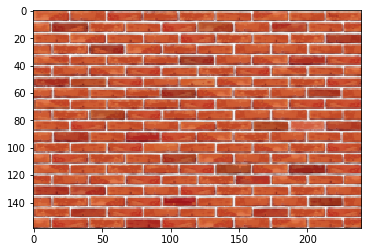

In [5]:
from skimage import transform

# Load the image
data = plt.imread('./dataset/bricks.png')

data = transform.resize(data, (159, 240))

# Display the image
plt.imshow(data);

### Images as data: changing images
To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

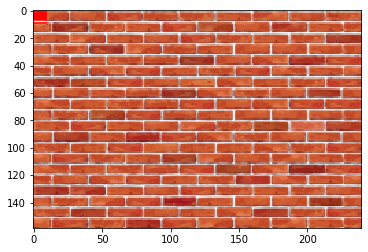

In [7]:
# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

# Visualize the result
plt.imshow(data);

## Classifying images


### Using one-hot encoding to represent images
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

- Shirts
- Dresses
- Shoes

In this exercise, you will create a one-hot encoding of a small sample of these labels.




In [11]:
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The number of image categories
n_categories = 3
# The unique values of categories in the data
categories = np.array(['shirt', 'dress', 'shoe'])

# Initalize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variables
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

### Evaluating a classifier
To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or shoe) is made from each of the test images, and these predictions are compared with the true labels of these images.



In [12]:
test_labels = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [0., 1., 0.], 
                        [0., 0., 1.], [0., 0., 1.], [0., 0., 1.], [0., 1., 0.]])

predictions = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [1., 0., 0.], 
                        [0., 0., 1.], [1., 0., 0.], [0., 0., 1.], [0., 1., 0.]])

In [13]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct / predictions.shape[0]
print(proportion_correct)

6.0
0.75


## Classification with Keras


### Build a neural network
We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the `Sequential` type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with `Dense` layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The `Dense` layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an `input_shape` keyword argument.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784, )))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 7,993
Trainable params: 7,993
Non-trainable params: 0
_________________________________________________________________


### Compile a neural network
Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list `['accuracy']` to the `metrics` keyword argument.

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting a neural network model to clothing data
In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: `train_data` that contains the pixel data for 50 images of the three clothing classes and `train_labels`, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

In [44]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [48]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape((50, 784))

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=20, verbose=False);

### Cross-validation for neural network evaluation
To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

In [49]:
# Reshape test data
test_data = test_data.reshape((10, 784))

# Evaluate the model
model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 711us/step - loss: 0.5428 - accuracy: 0.7000


[0.5428157448768616, 0.699999988079071]